In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import keras
from skimage import io
import skimage
import matplotlib.pyplot as plt
import numpy as np
import functions

Using TensorFlow backend.


pygame 2.0.0 (SDL 2.0.12, python 3.6.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4")
])
m.build([None, 224, 224, 3])  # Batch input shape.

m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", output_shape=[1280],
                   trainable=False),  # Can be True, see below.
])
m.build([None, 224, 224, 3])  # Batch input shape.

m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4",
                   trainable=False),  # Can be True, see below.
])
m.build([None, 299, 299, 3])  # Batch input shape.


m = tf.keras.Sequential([
    hub.KerasLayer("imagenet_inception_v3_feature_vector_4/",
                   trainable=False),  # Can be True, see below.
])
m.build([None, 299, 299, 3])  # Batch input shape.


m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_96/feature_vector/4",
                   trainable=False),  # Can be True, see below.
])
m.build([None, 96, 96, 3])  # Batch input shape.

In [2]:
m = tf.keras.Sequential([
    hub.KerasLayer("experts_bit_r50x1_in21k_substance_1/",
                   trainable=False),  # Can be True, see below.
])
m.build([None, 299, 299, 3])  # Batch input shape.


In [3]:
print("About model: ")
print(m.summary())

About model: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  23500352  
Total params: 23,500,352
Trainable params: 0
Non-trainable params: 23,500,352
_________________________________________________________________
None


In [4]:
images = io.imread_collection("data/RGB/Resized_299/*.jpeg")

In [ ]:
#print(images)

In [5]:
image_set = []
for image in images:
    image_set.append(image.astype("float32"))

In [6]:
image_set = np.array(image_set)

In [7]:
print("Image set shape = {}".format(image_set.shape))

Image set shape = (54, 299, 299, 3)


# Important Details
- Float32 type images
- Batch have to be np.array

---

### Let's find Feature Vectors

In [8]:
predictions = m.predict(image_set)

In [9]:
print("Prediction shape = {}".format(predictions.shape))

Prediction shape = (54, 2048)


----

# Visualization PCA Application

In [10]:
from sklearn.decomposition import PCA

In [11]:
X = predictions.copy()

In [12]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [13]:
print("PCA explained variance ratio = {}".format(pca.explained_variance_ratio_))

PCA explained variance ratio = [0.3827124  0.35762903]


In [14]:
X_pca = pca.transform(X)

In [15]:
X_pca.shape

(54, 2)

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig)
ax.scatter3D(X_pca[:,0], X_pca[:,1], X_pca[:,2])
plt.show()

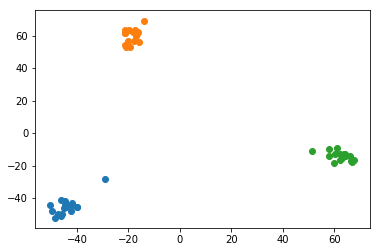

In [16]:
plt.scatter(X_pca[:18,0], X_pca[:18,1])
plt.scatter(X_pca[18:36,0], X_pca[18:36,1])
plt.scatter(X_pca[36:,0], X_pca[36:,1])

# Dİmension Reduced Data for Clustering

In [45]:
from sklearn.decomposition import PCA

In [107]:
X = predictions.copy()

In [108]:
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [109]:
print("PCA variance ratio = {}".format(pca.explained_variance_ratio_))
#print(pca.singular_values_)

PCA variance ratio = [0.38271248 0.35762897 0.03080003 0.02475099 0.02066435 0.01741599
 0.01466919 0.01192768 0.01062942 0.00957692]


In [110]:
X_cluster_data = pca.transform(X)

In [111]:
print("Dimension Reduced Data shape = {}".format(X_cluster_data.shape))

Dimension Reduced Data shape = (54, 10)


-----

### Let's use StandartScalar to improve PCA ( It is not useful.)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)

scaled_pca = PCA(n_components=2)
scaled_pca.fit(X_scaled)

print(scaled_pca.explained_variance_ratio_)
print(scaled_pca.singular_values_)

X_scaled_pca = scaled_pca.transform(X)

print(X_scaled_pca.shape)

plt.scatter(X_scaled_pca[:18,0], X_scaled_pca[:18,1])
plt.scatter(X_scaled_pca[18:37,0], X_scaled_pca[18:37,1])
plt.scatter(X_scaled_pca[37:,0], X_scaled_pca[37:,1])

### Let's use non-linear dimension reduction 

from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=2, kernel="cosine")
transformer.fit(X)
X_transformed = transformer.transform(X)

X_transformed.shape

plt.scatter(X_transformed[:,0], X_transformed[:,1])

# Clustering

In [112]:
from sklearn.cluster import KMeans

In [113]:
active_cluster_number = 3
print("Active Cluster Number = {}".format(active_cluster_number))

Active Cluster Number = 3


In [114]:
kmeans = KMeans(n_clusters=active_cluster_number)
kmeans.fit(X_cluster_data)

KMeans(n_clusters=3)

In [115]:
label = kmeans.labels_
print(label)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [116]:
#print("Cluster centers are {}".format(kmeans.cluster_centers_))

In [117]:
dist = kmeans.transform(X_cluster_data)

In [118]:
print("Distance = {}".format(dist[0]))

Distance = [111.98509  112.198746  31.581282]


In [119]:
min_dist = []
for ele in dist:
    min_dist.append(min(ele))

In [120]:
min_dist.sort()
#print(min_dist)
length = min_dist[-5]
print("Estimated Circular Distance = {}".format(length))

Estimated Circular Distance = 36.02537155151367


In [121]:
def IsMemberofCluster(feature_data, kmeans = kmeans):
    '''
    It checks, new data is member of any cluster or not?
    '''
    row,col = feature_data.shape
    
    # It begin with false. If it is member of any cluster, it will return true.
    imc = []
        
    distances = kmeans.transform(feature_data)
    #print(distances)
    
    for vector in distances:
        if np.all(vector > length):
            imc.append(False)
            continue
        imc.append(True)
        
    return imc

-----

imgs = io.imread_collection("test/test299/image_0.jpeg")

print(imgs)

test_imgs = []
for img in imgs:
    test_imgs.append(img.astype("float32"))

test_imgs = np.array(test_imgs)
test_imgs.shape

test_features = m.predict(test_imgs)

test_features[-1]

pca.explained_variance_ratio_

test_feature_data = pca.transform(test_features)

print(test_features[-1])

pca.explained_variance_ratio_

label = IsMemberofCluster(test_feature_data)

print(label)

-----

# Let's Add New Cluster

/home/mehmet/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/mehmet/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(299, 299, 3)


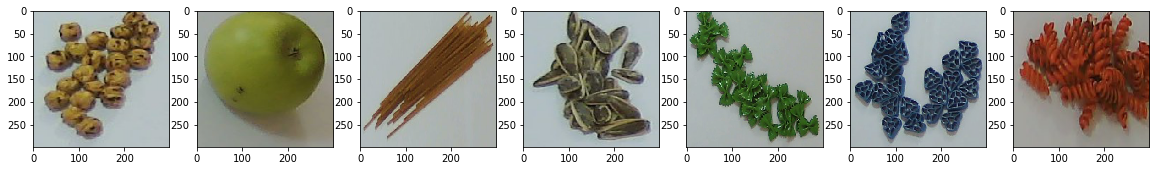

In [132]:
img_list = functions.Grab_and_parse()
f , ax = plt.subplots(nrows=1, ncols=len(img_list), figsize=(20,20))
for i, img in enumerate(img_list):
    ax[i].imshow(img)

In [133]:
### Main Add Cluster###

# let's select new image that is unknown.

for imag in img_list:
    imag0 = imag.astype("float32")
    imag1 = skimage.transform.rotate(imag,90)
    imag2 = skimage.transform.rotate(imag,180)
    imag3 = skimage.transform.rotate(imag,270)
# We add all versions of image in the list.
    image_list = [imag0, imag1, imag2, imag3]

    # Let's prepare list to model
    image_list = np.array(image_list)
    # Let's use model to extract feature vector
    image_features = m.predict(image_list)
    #print("Shape of feature vector of new set = {}".format(image_features.shape))
    

    # Now let's reduce their dimensions with PCA model.
    pca_image_features = pca.transform(image_features)
    #print("Shape of feature vector of new set = {}".format(pca_image_features.shape))

    # Lets check that anyone is member of any cluster?
    flags = IsMemberofCluster(pca_image_features, kmeans=kmeans)
    print("-----------------------")
    print("Cluster flags = {}".format(flags))

    if np.any(flags):
        # We found which ones can be in cluster.
        # Now,  lets find which cluster include this image.

        index = flags.index(True)
        #print(index)

        cluster = kmeans.predict(pca_image_features[index].reshape(1,-1))
        print("This image is in {} cluster".format(cluster))

        l = list(kmeans.labels_)
        times = l.count(cluster)
        #print(times)
        if times < 7:
            X = np.concatenate((X,image_features),axis=0)
            print("It is in Cluster but STILL NEW!!!!")
            #pca = PCA(n_components=10)
            #pca.fit(X)
            X_cluster_data = pca.fit_transform(X)
            #times = times + 4
            #kmeans = KMeans(n_clusters=active_cluster_number)
            kmeans.fit(X_cluster_data)


    flags = np.array(flags)
    if np.all(flags == False):
        # In this case, we have to think new cluster.
        active_cluster_number = active_cluster_number + 1 
        X = np.concatenate((X,image_features),axis=0)
        #X.shape

        # Firstly, update PCA.
        #pca = PCA(n_components=10)
        #pca.fit(X)
        #print(pca.explained_variance_ratio_)
        #print(pca.singular_values_)
        X_cluster_data = pca.fit_transform(X)

        # Fit new kmean.
        kmeans = KMeans(n_clusters=active_cluster_number)
        kmeans.fit(X_cluster_data)
        label = kmeans.labels_
        print("NEW CLUSTER!!!")
        #print("Cluster label = {}".format(label))


        # Find new cluster

-----------------------
Cluster flags = [True, True, True, True]
This image is in [4] cluster
-----------------------
Cluster flags = [True, True, True, True]
This image is in [6] cluster
It is in Cluster but STILL NEW!!!!
-----------------------
Cluster flags = [True, True, True, True]
This image is in [5] cluster
-----------------------
Cluster flags = [True, True, True, True]
This image is in [0] cluster
-----------------------
Cluster flags = [True, True, True, True]
This image is in [3] cluster
-----------------------
Cluster flags = [True, True, True, True]
This image is in [1] cluster
-----------------------
Cluster flags = [True, True, True, True]
This image is in [2] cluster


In [134]:
print("Active Cluster Number = {}".format(active_cluster_number))
print(kmeans.labels_)

Active Cluster Number = 7
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 6 6 6 6 0 0 0 0 5 5 5 5 6 6 6 6
 4 4 4 4 0 0 0 0 4 4 4 4]


# Visualization Last

In [135]:
visual = PCA(n_components=2)
visual.fit(X)

PCA(n_components=2)

In [136]:
print("PCA variance ratio = {}".format(visual.explained_variance_ratio_))
#print(pca.singular_values_)

PCA variance ratio = [0.19882876 0.18570916]


In [137]:
visual_data = visual.transform(X)

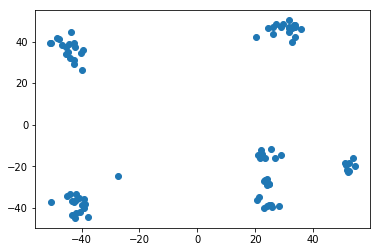

In [138]:
plt.scatter(visual_data[:,0], visual_data[:,1])